### Student Information
Name: 蕭泓佐

Student ID: R13922163

GitHub ID: davidshiao55

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__.

## TODO #2

### Install dependencies

In [306]:
!pip install umap-learn scikit-learn numpy pandas seaborn nltk matplotlib PAMI==2024.8.5 huggingface_hub fsspec nbformat

### Load the dataset

In [307]:
### Begin Assignment Here
import pandas as pd

X = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [308]:
len(X)

1500

In [309]:
X[:3]

sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...

In [310]:
X[X.sentiment == "nostalgia"]

sentiment                                            comment
1     nostalgia  The mist beautiful voice ever I listened to hi...
2     nostalgia  I have most of Mr. Reeves songs.  Always love ...
4     nostalgia  listening to his songs reminds me of my mum wh...
5     nostalgia  Every time I heard this song as a child, I use...
6     nostalgia  My dad loved listening to Jim Reeves, when I w...
...         ...                                                ...
1488  nostalgia  Yup !!!!  Bringing back an Enormous amount of ...
1491  nostalgia  real music...how i miss those days...brings ba...
1492  nostalgia  i used to cry over this song cause i had a boy...
1498  nostalgia  I was born in 1954 and started to be aware of ...
1499  nostalgia  This is the first CD I bought after my marriag...

[750 rows x 2 columns]

### check for misssing records

In [311]:
X.isnull()

sentiment  comment
0         False    False
1         False    False
2         False    False
3         False    False
4         False    False
...         ...      ...
1495      False    False
1496      False    False
1497      False    False
1498      False    False
1499      False    False

[1500 rows x 2 columns]

In [312]:
X.isnull().sum()

sentiment    0
comment      0
dtype: int64

In [313]:
dummy_series = pd.Series(["dummy_record"], index=["comment"])
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
print(f'length: {len(result_with_series)}')
result_with_series.isnull().sum()

length: 1501


sentiment    1
comment      0
dtype: int64

In [314]:
result_with_series.dropna(inplace=True)
print(f'length: {len(result_with_series)}')
result_with_series.isnull().sum()

length: 1500


sentiment    0
comment      0
dtype: int64

### dealing with duplicate data

In [315]:
print(X.duplicated())
print(f'\nduplicated data:\n{X[X.duplicated()]}')
print(f'sum of duplicated data: {sum(X.duplicated())}')

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

duplicated data:
        sentiment                                            comment
78  not nostalgia  never heard this song before... WOW What an am...
sum of duplicated data: 1


In [316]:
X.drop_duplicates(inplace=True)
len(X)

1499

### Data preprocessing

In [317]:
X_sample = X.sample(n=1000)
len(X_sample)

1000

In [318]:
X_sample[:4]

sentiment                                            comment
912      nostalgia  its so good so good brings me back i was like ...
674  not nostalgia  This song has had such an effect on all who he...
193  not nostalgia  MOST  AWESOME SONG EVER AND SUNG BE THE COOLES...
959      nostalgia  My Mother passed away in May  1973 and this so...

### plotting

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

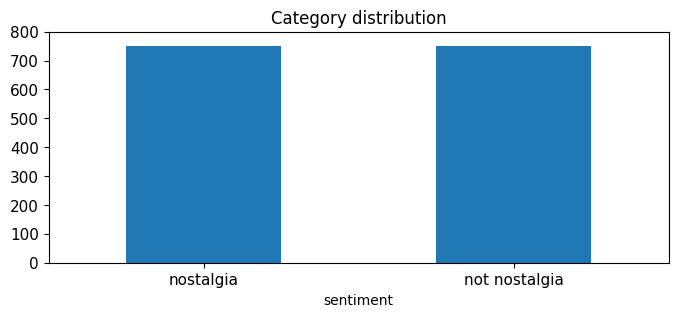

In [319]:
import numpy as np
import matplotlib.pyplot as plt
print(X.sentiment.value_counts())

# plot barchart for X
X.sentiment.value_counts().plot(kind="bar",
                                title="Category distribution",
                                ylim=[0, 800],
                                rot=0, fontsize=11, figsize=(8, 3))

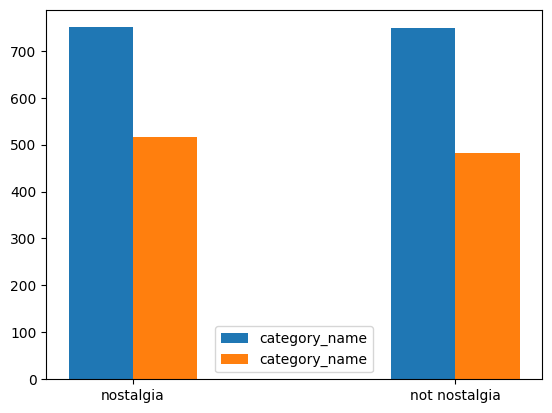

In [320]:
vc1 = X.sentiment.value_counts()
vc2 = X_sample.sentiment.value_counts()
x = np.arange(len(vc1))
width = 0.2
offset = width / 2
plt.bar(x=x - offset, height=vc1, width=width, label="category_name")
plt.bar(x=x + offset, height=vc2, width=width, label="category_name")
plt.xticks(x, vc1.index)
plt.legend()
plt.show()

### Feature Creation   

In [321]:
import nltk
import helpers.data_mining_helpers as dmh

nltk.download('punkt')
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))
X[:4]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...

### Feauture subset selection

In [322]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment)
print(X_counts[0])
print(f'feature for index 1598: {count_vect.get_feature_names_out()[1598]}')

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1
feature for index 1598: he


In [323]:
analyze = count_vect.build_analyzer()
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [324]:
X_counts.shape

(1499, 3730)

In [325]:
count_vect.get_feature_names_out()[:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [326]:
X_counts[:5, :100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [327]:
# feature name of the forth record's nonzero value
index = np.where(np.squeeze(X_counts[3, :100].toarray()) == 1)
count_vect.get_feature_names_out()[index]

array(['1st', '2nd', '30'], dtype=object)

### Plotting

In [328]:
# first twenty features only
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[:20]]
# obtain document index
plot_y = ["comment_"+ str(i) for i in list(X.index)[:20]]

plot_z = X_counts[:20, :20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

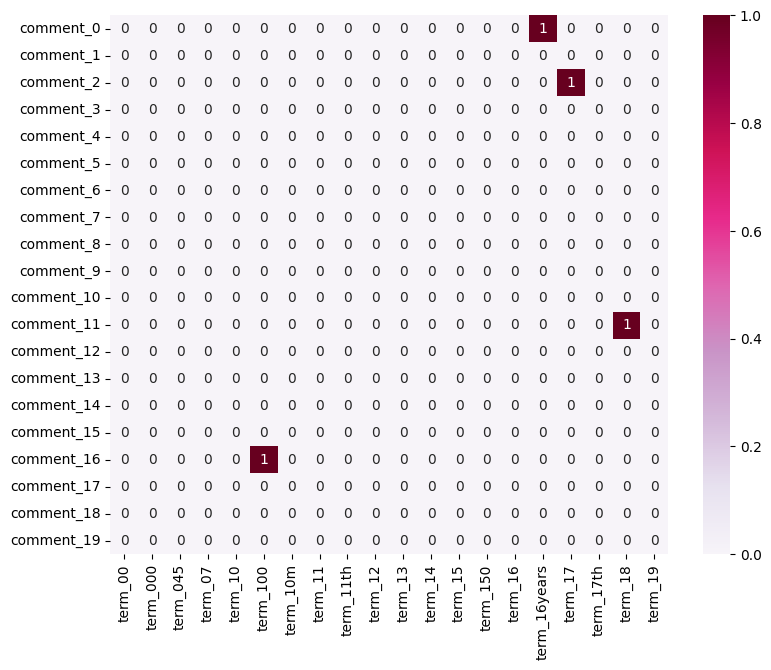

In [329]:
# heatmap
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

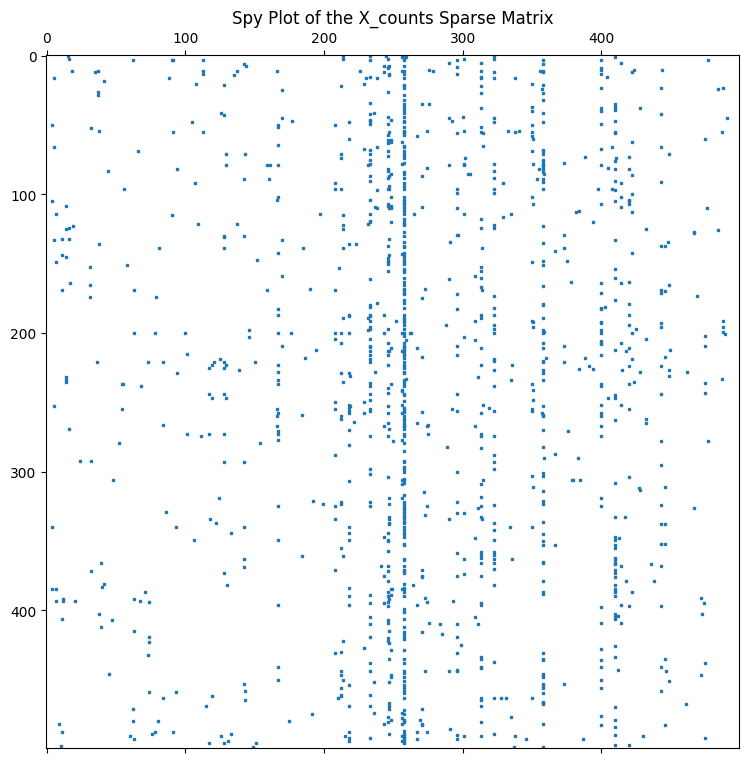

In [330]:
# spy plot
plt.figure(figsize=(9, 9))
plot_z = X_counts.toarray()[:500, :500]
plt.spy(plot_z, markersize=2)
plt.title("Spy Plot of the X_counts Sparse Matrix")
plt.show()

### Attribute Transformation / Aggregation

In [331]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies

array([1, 2, 1, ..., 1, 1, 1])

<ipython-input-332-9cb5cf1287d9>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



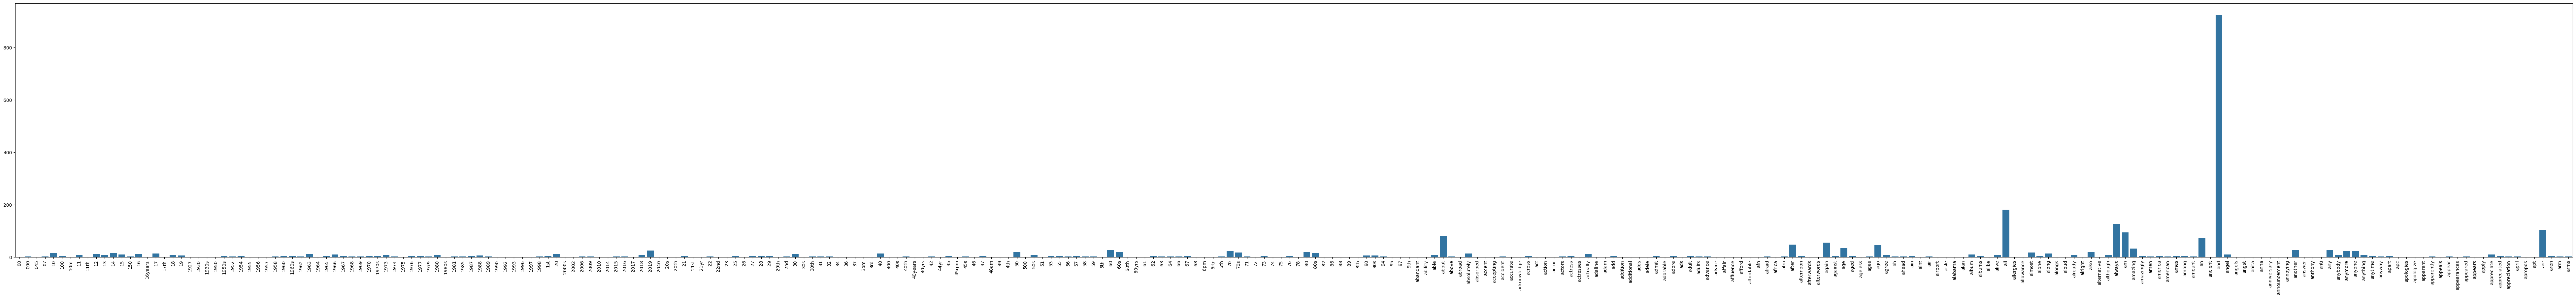

In [332]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [333]:
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300])
fig.show()

In [334]:
# only show the top N most frequent terms for better visualization
limit = 50
limited_count_vect = CountVectorizer(max_features=limit)  # Limit to the most frequent terms

limited_X_counts = limited_count_vect.fit_transform(X.comment)

limited_term_frequencies = np.array(limited_X_counts.sum(axis=0))[0]

fig = px.bar(x=limited_count_vect.get_feature_names_out(),
            y=limited_term_frequencies)
fig.show()

In [335]:
# long tail
sorted_indices = np.argsort(term_frequencies)[::-1][:100]
sorted_terms = count_vect.get_feature_names_out()[sorted_indices]
sorted_frequencies = term_frequencies[sorted_indices]

fig = px.bar(x=sorted_terms,
            y=sorted_frequencies)
fig.show()

<ipython-input-336-ed19f277d02c>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



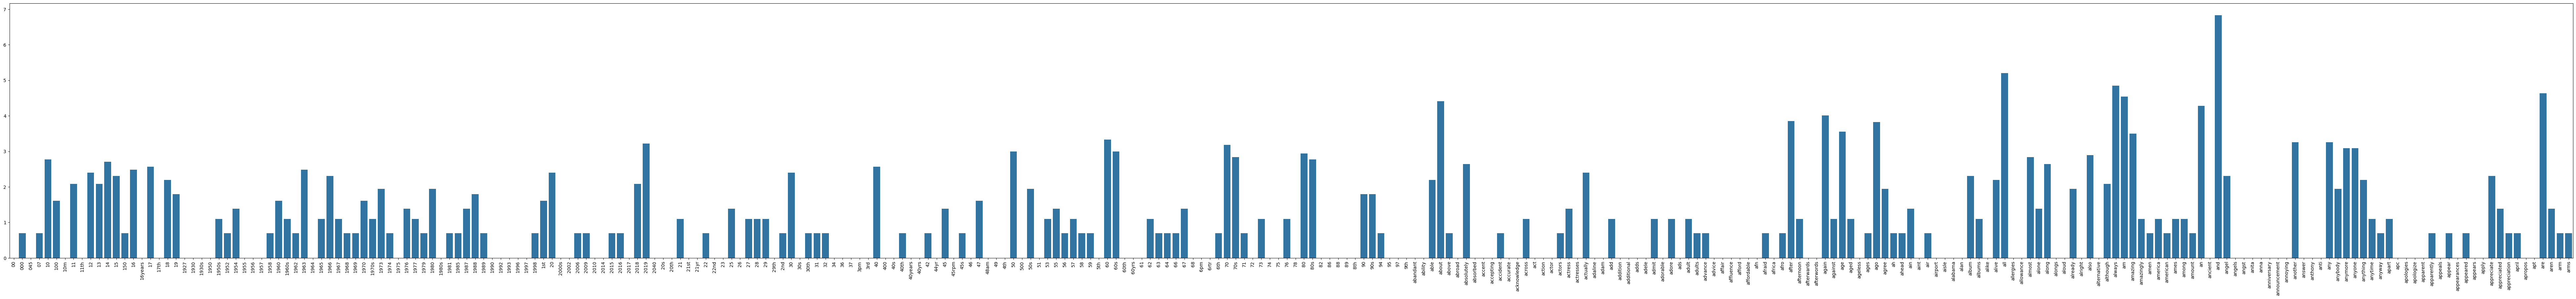

In [336]:
# log distribution
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [337]:
# log distribution with sorted indice

sorted_indices_log = np.argsort(term_frequencies_log)[::-1][:100]
sorted_terms_log = count_vect.get_feature_names_out()[sorted_indices_log]
sorted_frequencies_log = np.array(term_frequencies_log)[sorted_indices_log]

fig = px.bar(x=sorted_terms_log,
            y=sorted_frequencies_log)
fig.show()

### Finding frequent patterns

In [338]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each sentiment
sentiments = X['sentiment'].unique()
sentiment_dfs = {}

for s in sentiments:
    sentiment_dfs[s] = X[X['sentiment'] == s].copy()

# Function to create term-document frequency DataFrame for each sentiment
def create_term_document_df(df):
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(df['comment'])

    words = count_vect.get_feature_names_out()

    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

    return term_document_df

filt_term_document_dfs = {}

for s in sentiments:
    filt_term_document_dfs[s] = create_term_document_df(sentiment_dfs[s])

In [339]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
sentiment_number=0
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiments[sentiment_number]}:")
filt_term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
744     0         0      0        0    0    0        0      0  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     1         0      0        0    0    0        0      0  
748     0         0      0        0    0    0        0      0  

[749 rows x 2602 columns]

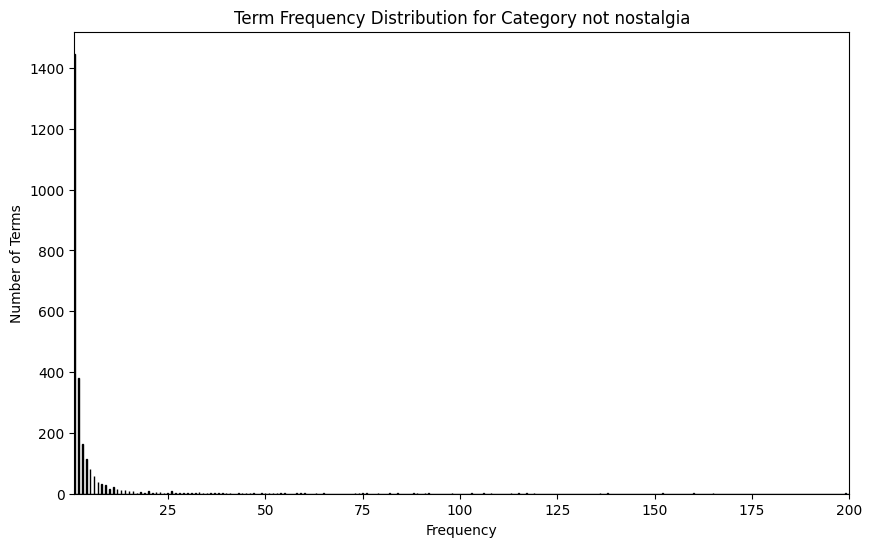

In [340]:
 # Sum over all comments to get total frequency for each word
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {sentiments[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [341]:
# filter top 5%
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[sentiment_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {sentiments[sentiment_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'on', 'what', 'not', 'be', 'can', 'me', 'voice', 'just', 'as', 'beautiful', 'songs', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'never', 'much', 'about', 'who', 'really', 'if', 'we', 'more', 'best', 'ever', 'by', 'thank', 'think', 'would', 'only', 'how', 'don', 'still', 'has', 'very', 'there', 'am', 'out', 'him', 'these', 'could', 'up', 'old', 'hear', 'do', 'listen', 'an', 'singer', 'had', 'many', 'here', 'such', 'version', 'too', 'today', 'been', 'most', 'get', 'your', 'people', 'world', 'heard', 'man', 'video', 'some', 'sing', 'listening', 'real', 'years', 'were', 'than', 'singing', 'heart', 'nice', 'their', 'better', 'life', 'day', 'its', 'then', 'way', 'sad', 'those',

In [342]:
# filter bottom 1 %
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[sentiment_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {sentiments[sentiment_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']


In [343]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)

    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()

    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for s in sentiments:
    print(f'\nFor category {s} we filter the following words:')
    term_document_dfs[s] = filter_top_bottom_words_by_sum(filt_term_document_dfs[s])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiments[sentiment_number]}:")
term_document_dfs[sentiments[sentiment_number]]



For category not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
got         23
amazing     23
first       23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row         

000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0      0    0   0    0    0   0   0   0   0    0  ...        0         0   
1      0    0   0    0    0   0   0   0   0    0  ...        0         0   
2      0    0   0    0    0   0   0   0   0    0  ...        0         0   
3      0    0   0    0    0   0   0   0   0    0  ...        0         0   
4      0    0   0    0    0   0   0   0   0    0  ...        0         0   
..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ...  ...      ...       ...   
744    0    0   0    0    0   0   0   0   0    0  ...        0         0   
745    0    0   0    0    0   0   0   0   0    0  ...        0         0   
746    0    0   0    0    0   0   0   0   0    0  ...        0         0   
747    0    0   0    0    0   0   0   0   0    0  ...        0         0   
748    0    0   0    0    0   0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
744           0         0      0        0    0    0        0      0  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  
748           0         0      0        0    0    0        0      0  

[749 rows x 2446 columns]

In [344]:
# compare similarities and differences
term_document_sets = [set(term_document_dfs[s].columns) for s in sentiments]

similarities = term_document_sets[0] & term_document_sets[1]
print(f"word in all 2 categories: {similarities}")

for i in range(2):
    diff = term_document_sets[i]
    for j in range(2):
        if i != j:
            diff = diff - term_document_sets[j]
    print(f"word only in {sentiments[i]}: {diff}")


word in all 2 categories: {'gather', 'silver', 'late', 'familiar', '50s', 'cars', 'let', '50', 'crush', 'talent', 'hot', '53', 'green', 'see', 'cheap', 'teen', 'replaced', 'invasion', 'different', 'awesome', 'guy', 'jimmy', 'past', 'being', 'least', 'able', 'straight', 'etc', 'hank', 'once', 'vocals', 'moving', 'sounded', 'wanted', 'intro', 'message', 'emotions', 'two', 'goodbye', 'rap', 'banger', 'comes', 'boyfriend', 'around', 'help', '10', 'hell', 're', 'concert', 'southern', 'gary', 'king', 'appeared', 'stopped', 'classic', 'seeing', 'happened', 'coffee', 'looks', 'calling', 'deserved', 'remain', 'asked', '90s', 'sun', 'hoping', 'careful', 'while', 'generations', 'grew', 'driving', 'moved', 'missed', 'soulful', 'fan', 'turns', 'partner', 'tears', 'special', 'knew', 'page', 'others', 'charge', 'sha', 'twin', 'everything', 'none', 'john', 'romance', 'through', 'someone', 'lives', 'timeless', 'told', 'jack', 'idea', 'list', 'country', 'perhaps', 'ends', 'hits', 'crap', 'appear', 'comi

In [345]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for s in sentiments:
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[s])
    obj.convert2TransactionalDatabase(f'td_freq_db_{s}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


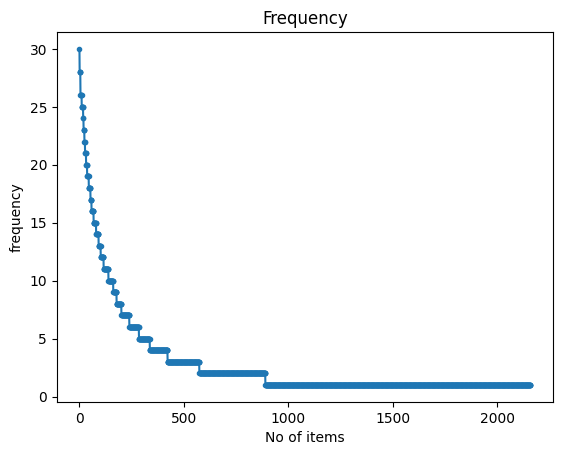

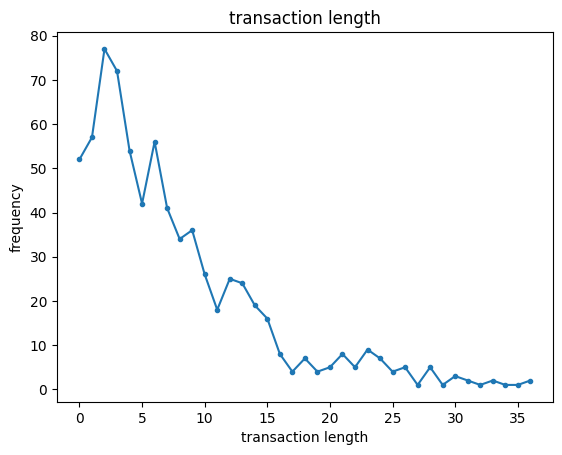

In [346]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


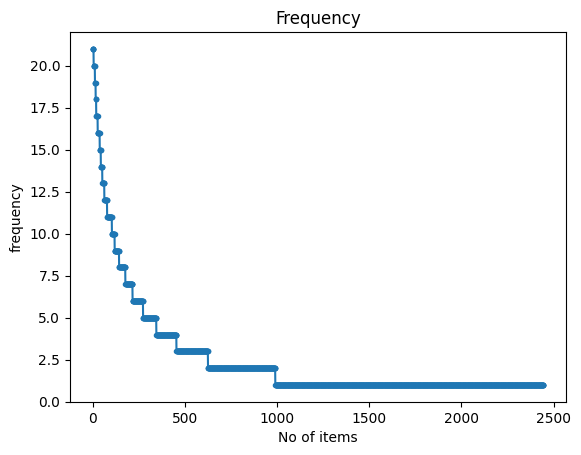

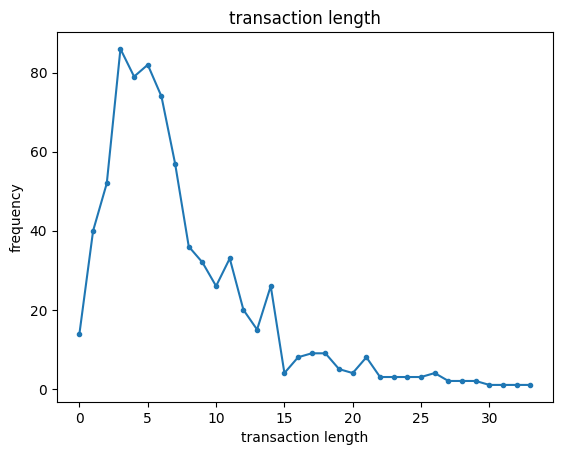

In [347]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [348]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.017179489135742188


In [349]:
obj1.save('freq_patterns_nostalgia.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]

In [350]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.011366128921508789


In [351]:
obj2.save('freq_patterns_not_nostalgia.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      every       21
140      loved       21
141    classic       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]

In [352]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
127      will       28
126     would       28
125      ever       28
123        or       26
120       kid       26
..        ...      ...
142  handsome        9
143   perfect        9
144        ll        9
145     happy        9
0         its        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [353]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])
terms = count_vect.get_feature_names_out()

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
0      0    0    0   0   0    0    0   0     0   0  ...       0       0   
1      0    0    0   0   0    0    0   0     0   0  ...       0       0   
2      0    0    0   0   0    0    0   0     0   0  ...       0       0   
3      0    0    0   0   0    0    0   0     0   0  ...       0       0   
4      0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1495   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1499   0    0    0   0   0    0    0   0     0   0  ...       0       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
0          0       0     0         0        0   0      0    0  
1          0       0     0         0        0   0      0    0  
2          0       0     0         0        0   0      0    0  
3          0       0     0         0        0   0      0    0  
4          0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1495       0       0     0         0        0   0      0    0  
1496       0       0     0         0        0   0      0    0  
1497       0       0     0         0        0   0      0    0  
1498       0       0     0         0        0   0      0    0  
1499       0       0     0         0        0   0      0    0  

[1499 rows x 3950 columns]

In [354]:
# Answer Here
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

minSup=[3, 6, 9]
for ms in minSup:
    print(f'minSup = {ms}')
    obj = alg.MaxFPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=ms)
    obj.mine()
    frequentPatternsDF_nostalgia = obj.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
    print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
    print(frequentPatternsDF_nostalgia)

import PAMI.frequentPattern.topk.FAE as alg

Ks = [100, 200, 300]
for k in Ks:
    print(f'k = {k}')
    obj = alg.FAE(iFile='td_freq_db_nostalgia.csv', k=k)
    obj.mine()
    frequentPatternsDF_nostalgia = obj.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
    print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
    print(frequentPatternsDF_nostalgia)

minSup = 3
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 682
Runtime: 0.039980173110961914
           Patterns  Support
0          skating         3
1           walker         3
2            scott         3
3          17 1987         3
4             stop         3
..              ...      ...
677      will such         4
678      ever only         3
679     would only         4
680       ever kid         3
681  favorite will         3

[682 rows x 2 columns]
minSup = 6
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 274
Runtime: 0.02129983901977539
      Patterns  Support
0        1973         6
1     looking         6
2    actually         6
3        fast         6
4    innocent         6
..         ...      ...
269      only        26
270       kid        26
271     would        28
272      ever        28
273  favorite        30

[274 rows x 2 columns]
minSup = 9
Maxi

### Dimensionality Reduction

In [355]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)

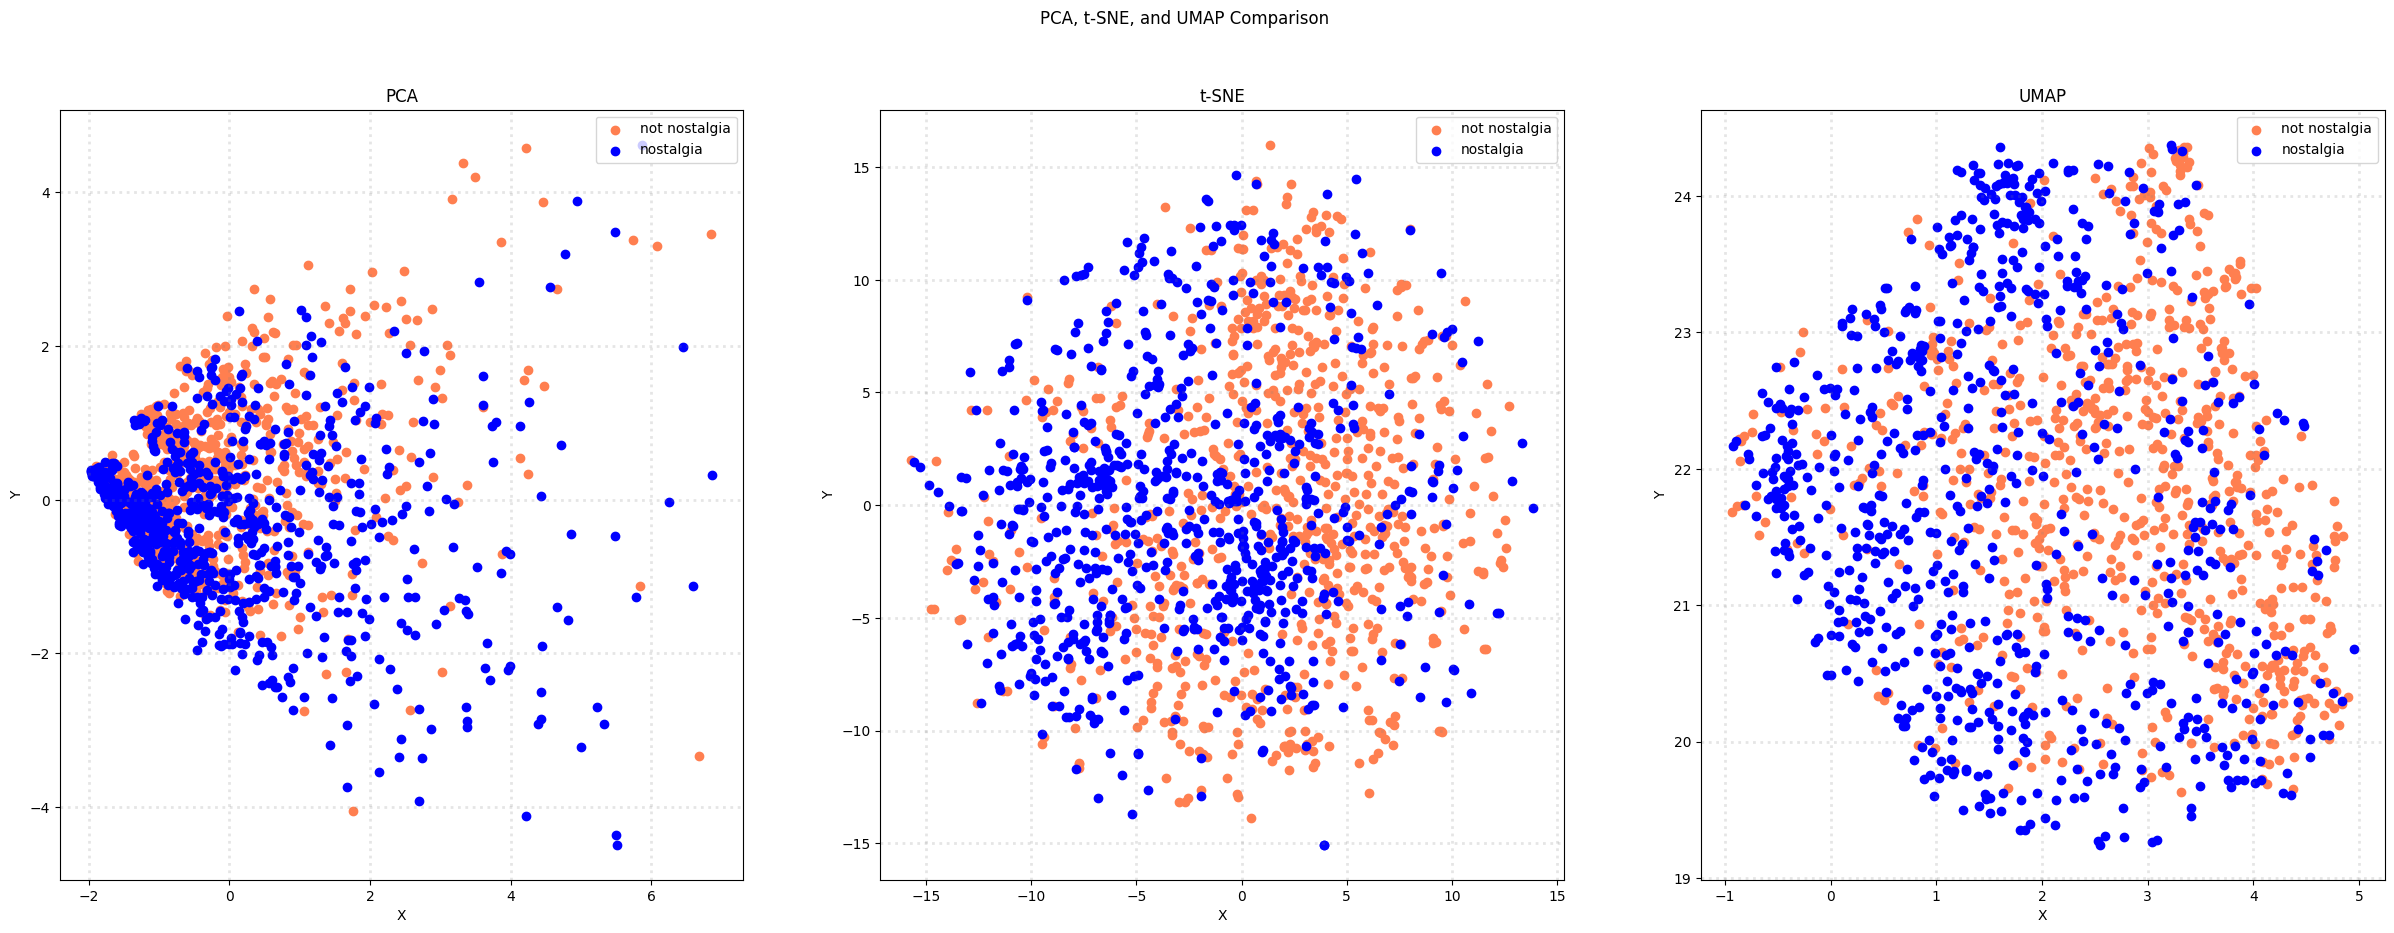

In [356]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, s in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == s].T[0]
        ys = X_reduced[X['sentiment'] == s].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=s)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [357]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

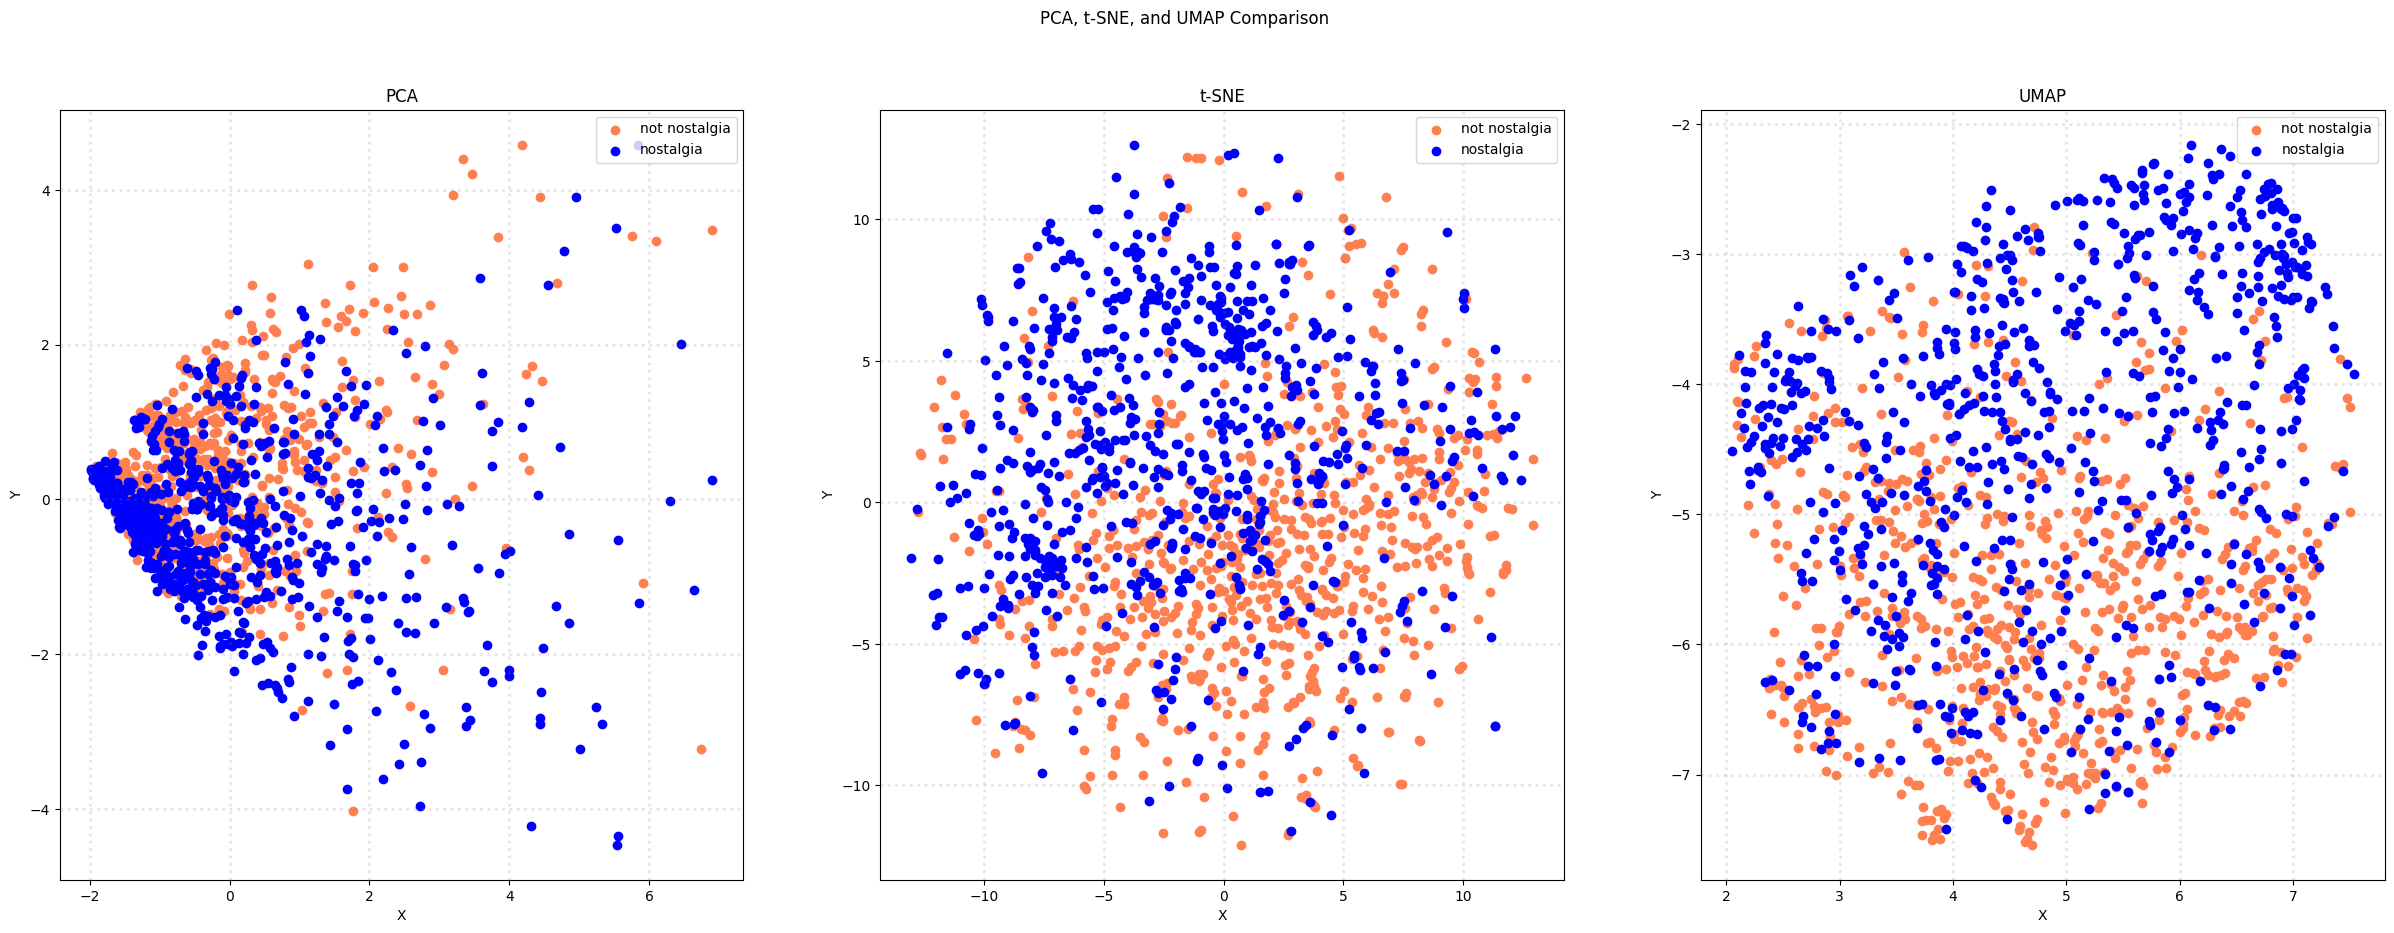

In [358]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, s in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == s].T[0]
        ys = X_reduced[X['sentiment'] == s].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=s)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [359]:
X_umap_tdm_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)
X_pca_tdm_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm_3d = TSNE(n_components=3).fit_transform(tdm_df.values)

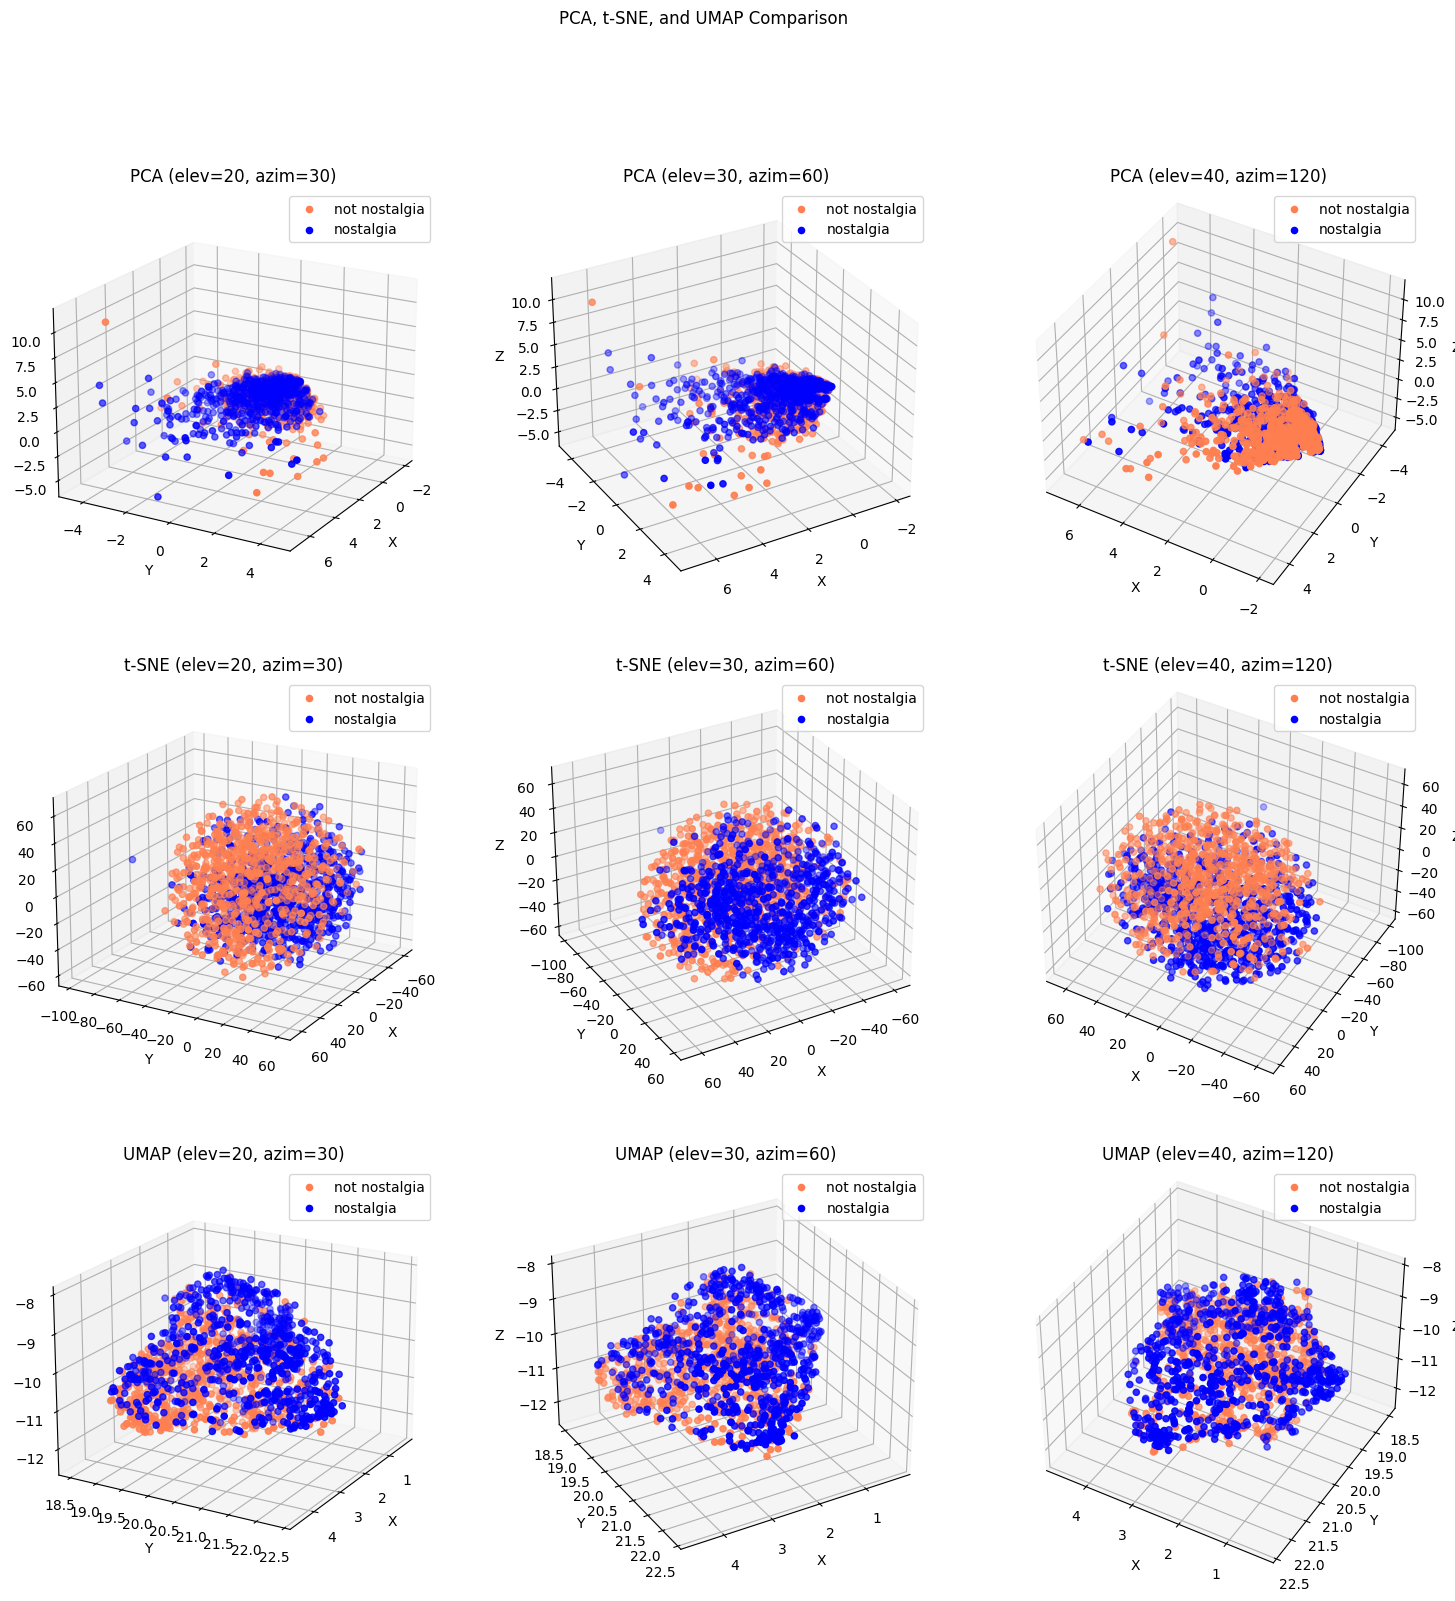

In [360]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment'].unique()

fig, axes = plt.subplots(3, 3, figsize=(18, 18), subplot_kw={'projection': '3d'})

fig.suptitle('PCA, t-SNE, and UMAP Comparison')

view_angles = [(20, 30), (30, 60), (40, 120)]  # Different angles

# Define a function to create a scatter plot for each method
def plot_scatter_3d(ax, X_reduced, title):
    for i, (elev, azim) in enumerate(view_angles):
        for c, s in zip(col, sentiments):
            xs = X_reduced[X['sentiment'] == s].T[0]
            ys = X_reduced[X['sentiment'] == s].T[1]
            zs = X_reduced[X['sentiment'] == s].T[2]
            ax[i].scatter(xs, ys, zs, c=c, marker='o', label=s)
            ax[i].view_init(elev=elev, azim=azim)
            ax[i].set_title(f'{title} (elev={elev}, azim={azim})')

        ax[i].grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
        ax[i].set_xlabel('X')
        ax[i].set_ylabel('Y')
        ax[i].set_zlabel('Z')
        ax[i].legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter_3d(axes[0], X_pca_tdm_3d, 'PCA')
plot_scatter_3d(axes[1], X_tsne_tdm_3d, 't-SNE')
plot_scatter_3d(axes[2], X_umap_tdm_3d, 'UMAP')

plt.show()

###Dicretization and Binarization

In [361]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)
X['bin_sentiment'] = mlb.transform(X['sentiment'])
X[0:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                   tokenized_comment  bin_sentiment  
0  {at, fan, can, his, now,, those, we, many, lov...              1  
1  {kid, angel, listened, his, Never, when, him, ...              0  
2  {at, grow, how, grew, my, Jesus, voice,, leave...              0  
3  {me", God, my, leave, can, some, granted, when...              1  
4  {to, my, reminds, listening, me, his, who, of,...              0  
5  {cry....because, many, souls., it, still, Now,...              0  
6  {do, how, things., listening, when, teenager, ...              0  
7  {am, now, his, he, TO, a, LISTENED, feeling, H...              0  
8        {my, Wherever, in, heart, are, you, always}              1

###Data exploration

In [362]:
# We retrieve 3 sentences for a random record
comment_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
comment_to_transform_1.append(random_record_1)

comment_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
comment_to_transform_2.append(random_record_2)

comment_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
comment_to_transform_3.append(random_record_3)

print(comment_to_transform_1)
print(comment_to_transform_2)
print(comment_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [363]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
comment_vector_count_1 = count_vect.transform(comment_to_transform_1)
comment_vector_count_2 = count_vect.transform(comment_to_transform_2)
comment_vector_count_3 = count_vect.transform(comment_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
comment_vector_count_1_bin = binarize(comment_vector_count_1)
comment_vector_count_2_bin = binarize(comment_vector_count_2)
comment_vector_count_3_bin = binarize(comment_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(comment_vector_count_1.todense())
print(comment_vector_count_2.todense())
print(comment_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [364]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(comment_vector_count_1, comment_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(comment_vector_count_1, comment_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(comment_vector_count_2, comment_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(comment_vector_count_1, comment_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(comment_vector_count_2, comment_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(comment_vector_count_3, comment_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2.item()})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3.item()})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3.item()})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1.item()})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2.item()})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3.item()})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


###Data Classification

In [365]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(X[['bin_sentiment', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['bin_sentiment'], test_size=0.3, random_state=42)

In [366]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
486    0    0    0   0   0    0    0   0     0   0  ...      0         0   
528    0    0    0   0   0    0    0   0     0   0  ...      0         0   
200    0    0    0   0   0    0    0   0     0   0  ...      0         0   
890    0    0    0   0   0    0    0   0     0   0  ...      0         0   
845    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1131   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1295   0    0    0   0   0    0    0   0     0   0  ...      0         0   
861    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1460   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1127   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
486       0         0        0    0    0    0        0      0  
528       0         0        0    0    0    0        0      0  
200       0         0        0    0    0    0        0      0  
890       0         0        0    0    0    0        0      0  
845       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1131      0         0        0    0    0    0        0      0  
1295      0         0        0    0    0    0        0      0  
861       0         0        0    0    0    0        0      0  
1460      0         0        0    0    0    0        0      0  
1127      0         0        0    0    0    0        0      0  

[1049 rows x 3730 columns]

In [367]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1117   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1396   0    0    0   0   0    0    0   0     0   0  ...      0         0   
423    0    0    0   0   0    0    0   0     0   0  ...      0         0   
414    0    0    0   0   0    0    0   0     0   0  ...      0         0   
452    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1084   0    0    0   0   0    0    0   0     0   0  ...      0         0   
991    0    0    0   0   0    0    0   0     0   0  ...      0         0   
651    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1188   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1459   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1117      0         0        0    0    0    0        0      0  
1396      0         0        0    0    0    0        0      0  
423       0         0        0    0    0    0        0      0  
414       0         0        0    0    0    0        0      0  
452       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1084      0         0        0    0    0    0        0      0  
991       0         0        0    0    0    0        0      0  
651       0         0        2    0    0    0        0      0  
1188      0         0        0    0    0    0        0      0  
1459      0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [368]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8222    0.9528    0.8827       233
not nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [369]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(X[['bin_sentiment', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['bin_sentiment'], test_size=0.3, random_state=42)

In [370]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
486    0    0    0   0   0    0    0   0     0   0  ...       0       0   
528    0    0    0   0   0    0    0   0     0   0  ...       0       0   
200    0    0    0   0   0    0    0   0     0   0  ...       0       0   
890    0    0    0   0   0    0    0   0     0   0  ...       0       0   
845    0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1131   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1295   0    0    0   0   0    0    0   0     0   0  ...       0       0   
861    0    0    0   0   0    0    0   0     0   0  ...       0       0   
1460   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1127   0    0    0   0   0    0    0   0     0   0  ...       0       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
486        0       0     0         0        0   0      0    0  
528        0       0     0         0        0   0      0    0  
200        0       0     0         0        0   0      0    0  
890        0       0     0         0        0   0      0    0  
845        0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1131       0       0     0         0        0   0      1    0  
1295       0       0     0         0        0   0      0    1  
861        0       0     0         0        0   0      0    0  
1460       0       0     0         0        0   0      0    0  
1127       0       0     0         0        0   0      0    0  

[1049 rows x 3950 columns]

In [371]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
1117   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1396   0    0    0   0   0    0    0   0     0   0  ...       0       0   
423    0    0    0   0   0    0    0   0     0   0  ...       0       0   
414    0    0    0   0   0    0    0   0     0   0  ...       0       0   
452    0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1084   0    0    0   0   0    0    0   0     0   0  ...       0       0   
991    0    0    0   0   0    0    0   0     0   0  ...       0       0   
651    0    0    0   0   0    0    0   0     0   0  ...       0       0   
1188   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1459   0    0    0   0   0    0    0   0     0   0  ...       0       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
1117       0       0     0         0        0   0      0    0  
1396       0       0     0         0        0   0      0    0  
423        0       0     0         0        0   0      0    0  
414        0       0     0         0        0   0      0    0  
452        0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1084       0       0     0         0        0   0      0    0  
991        0       0     0         0        0   0      0    0  
651        0       0     0         0        0   0      1    0  
1188       0       1     0         0        0   0      0    0  
1459       0       0     0         0        0   0      0    0  

[450 rows x 3950 columns]

In [372]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8644444444444445

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8185    0.9485    0.8787       233
not nostalgia     0.9333    0.7742    0.8463       217

     accuracy                         0.8644       450
    macro avg     0.8759    0.8613    0.8625       450
 weighted avg     0.8739    0.8644    0.8631       450



##TODO #3

### Generate new meaningful data visualization

In [373]:
import pandas as pd

# Step 1: Load data
X = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [374]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 2: Split data by sentiment
nostalgia_comments = X[X['sentiment'] == 'nostalgia']['comment'].tolist()
not_nostalgia_comments = X[X['sentiment'] == 'not nostalgia']['comment'].tolist()

In [375]:
import string

# Step 3: Tokenize and count word frequencies
def tokenize(text_list):
    # Combine all comments into one text
    combined_text = " ".join(text_list).lower()

    # Remove non-alphabetic characters and split by whitespace
    combined_text = combined_text.translate(str.maketrans('', '', string.punctuation))

    tokens = combined_text.split()

    return tokens

nostalgia_tokens = tokenize(nostalgia_comments)
not_nostalgia_tokens = tokenize(not_nostalgia_comments)

In [376]:
# Get word frequencies for each category
nostalgia_word_counts = Counter(nostalgia_tokens)
not_nostalgia_word_counts = Counter(not_nostalgia_tokens)

# Step 4: Identify and filter common words
common_words = set(nostalgia_word_counts.keys()).intersection(set(not_nostalgia_word_counts.keys()))

In [377]:
# Step 5: Create word clouds excluding common words
def generate_wordcloud(tokens, common_words, title):
    # Filter tokens to exclude common words
    filtered_tokens = [word for word in tokens if word not in common_words]
    # Convert filtered tokens back to a string
    filtered_text = " ".join(filtered_tokens)

    # Generate word cloud
    wordcloud = WordCloud(stopwords=common_words, width=800, height=400, background_color='white').generate(filtered_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

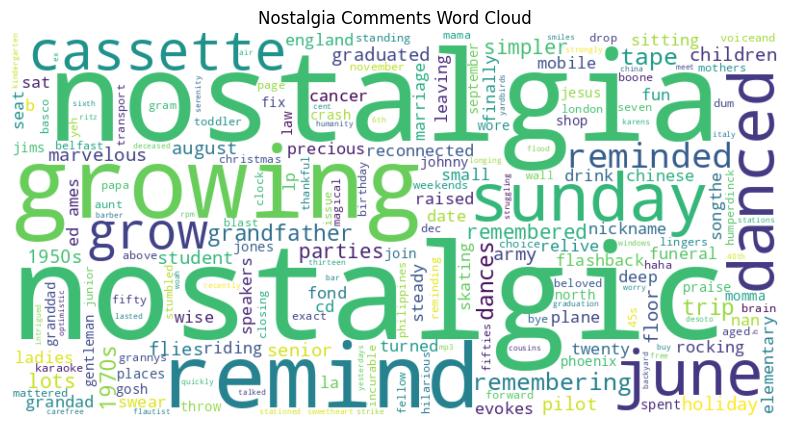

In [378]:
generate_wordcloud(nostalgia_tokens, common_words, "Nostalgia Comments Word Cloud")

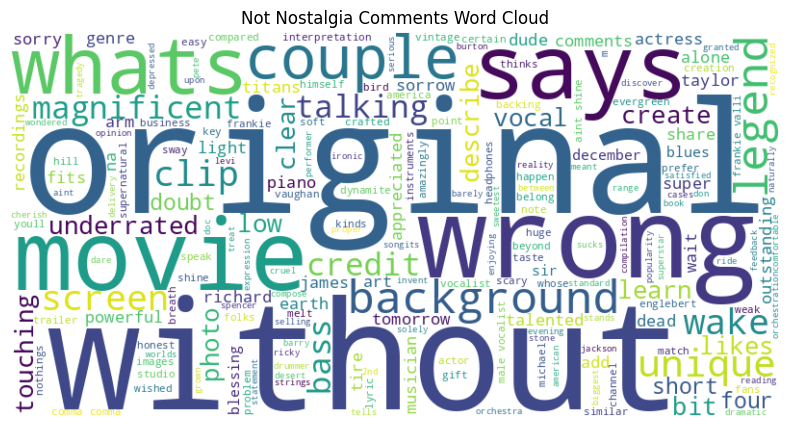

In [379]:
generate_wordcloud(not_nostalgia_tokens, common_words, "Not Nostalgia Comments Word Cloud")

###Generate TF-IDF features from the tokens of each text


In [380]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Prepare the text data
text_data = X['comment'].tolist()

# Step 2: Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,     # Ignore words with a document frequency higher than 95%
    min_df=0.01,     # Ignore words with a document frequency lower than 1%
    stop_words='english'  # Remove common English stopwords
)

# Step 3: Fit and transform the text data to generate the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Step 4: Convert TF-IDF matrix to a pandas DataFrame for easier interpretation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the resulting TF-IDF DataFrame
print(tfidf_df)


       10  2019   50   60  60s   70  70s   80  80s       age  ...  words  \
0     0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.293491  ...    0.0   
1     0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...    0.0   
2     0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.249722  ...    0.0   
3     0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...    0.0   
4     0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...    0.0   
...   ...   ...  ...  ...  ...  ...  ...  ...  ...       ...  ...    ...   
1495  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...    0.0   
1496  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...    0.0   
1497  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.476851  ...    0.0   
1498  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.616156  ...    0.0   
1499  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...    0.0   

      world  wow  year     years  yes  yesterday  young  youth  youtube  
0       0.0  

###Implement a simple Naive Bayes classifier that automatically classifies the records into their categories

In [381]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load data
df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

# Step 2: Split data into training and testing sets
X = df['comment']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Naive Bayes with Word Frequency Features
count_vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=0.01,
    stop_words='english')
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train_count, y_train)
y_pred = mnb.predict(X_test_count)

print("Accuracy (Word Frequency Features):", accuracy_score(y_test, y_pred))
print("\nClassification Report (Word Frequency Features):\n", classification_report(y_test, y_pred))

Accuracy (Word Frequency Features): 0.8533333333333334

Classification Report (Word Frequency Features):
                precision    recall  f1-score   support

    nostalgia       0.83      0.89      0.86       225
not nostalgia       0.88      0.82      0.85       225

     accuracy                           0.85       450
    macro avg       0.86      0.85      0.85       450
 weighted avg       0.86      0.85      0.85       450



In [382]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=0.01,
    stop_words='english'  # Remove common English stopwords
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

gnb = GaussianNB()
gnb.fit(X_train_tfidf.toarray(), y_train)
y_pred = gnb.predict(X_test_tfidf.toarray())

print("Accuracy (TF-IDF Features):", accuracy_score(y_test, y_pred))
print("\nClassification Report (TF-IDF Features):\n", classification_report(y_test, y_pred))

Accuracy (TF-IDF Features): 0.8244444444444444

Classification Report (TF-IDF Features):
                precision    recall  f1-score   support

    nostalgia       0.84      0.80      0.82       225
not nostalgia       0.81      0.85      0.83       225

     accuracy                           0.82       450
    macro avg       0.83      0.82      0.82       450
 weighted avg       0.83      0.82      0.82       450



Word Frequency (MultinomialNB) performed slightly better, suggesting that frequent terms were effective in distinguishing between "nostalgic" and "non-nostalgic" comments. This could indicate that commonly occurring words in specific contexts were significant for classification.

## TODO #4  In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

From the dataset we see in the lab, we can see that the text are in an email format with no pre-processing step. I implement a data cleaning pipeline in the following code.
It also seems to improve the classification accuracy.

In [383]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

df = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
df['category'] = twenty_train.target
df['category_name'] = df.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [384]:
from nltk.corpus import stopwords
import re
import string

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # remove email address
    text = re.sub(r'\S+@\S+', '', text)
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # tokenize
    tokens = text.split()
    # remove stop words
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [385]:
df['cleaned_text'] = df['text'].apply(clean_text)
df[['text', 'cleaned_text']]

text  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...   
...                                                 ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...   

                                           cleaned_text  
0     michael collier subject converting images hp l...  
1     aniruddha b deglurkar subject help splitting t...  
2     darin johnson subject harrassed work could use...  
3     mm zwart subject catholic church poland organi...  
4     stanly subject elder brother organization ncr ...  
...                                                 ...  
2252  christophe roos subject wanted rat cell line a...  
2253  michael holloway subject transplant recipients...  
2254  gary merrill subject jiggers originator nntppo...  
2255  dan wallach subject faq typing injuries 24 gen...  
2256  steve dyer subject msg sensitivity superstitio...  

[2257 rows x 2 columns]

In [386]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

X = df['cleaned_text']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train_count, y_train)
y_pred = mnb.predict(X_test_count)

print("Accuracy (Word Frequency Features):", accuracy_score(y_test, y_pred))
print("\nClassification Report (Word Frequency Features):\n", classification_report(y_test, y_pred))

Accuracy (Word Frequency Features): 0.9705014749262537

Classification Report (Word Frequency Features):
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       129
           1       0.97      0.99      0.98       169
           2       0.97      0.97      0.97       189
           3       0.97      0.96      0.97       191

    accuracy                           0.97       678
   macro avg       0.97      0.97      0.97       678
weighted avg       0.97      0.97      0.97       678

